In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
with open("data_set.csv","r")as file:
    reader=csv.reader(file)
df=pd.read_csv("data_set.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [152]:
df.shape #no of rows-1338 , no of columns -7

(1338, 7)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [154]:
cat_cols=df.select_dtypes(include='object').columns
print(f'No of categorical columns = {len(cat_cols)}\n They are {(cat_cols.values)}')

No of categorical columns = 3
 They are ['sex' 'smoker' 'region']


In [155]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [156]:
for i in cat_cols:
    print(f'Feature:{i}')
    unique=df[i].nunique()
    print(f'Number of categories={unique}')
    category=df[i].unique()
    print(f'Categories={category}\n')
    print(f'value\t count percentage')
    
    for j in range(0,len(category)):
        print(f'{category[j]:10}:{len(df[df[i]==category[j]]):3}:{round(len(df[df[i]==category[j]])*100/len(df),1):7}%')
        print('-'*100)

Feature:sex
Number of categories=2
Categories=['female' 'male']

value	 count percentage
female    :662:   49.5%
----------------------------------------------------------------------------------------------------
male      :676:   50.5%
----------------------------------------------------------------------------------------------------
Feature:smoker
Number of categories=2
Categories=['yes' 'no']

value	 count percentage
yes       :274:   20.5%
----------------------------------------------------------------------------------------------------
no        :1064:   79.5%
----------------------------------------------------------------------------------------------------
Feature:region
Number of categories=4
Categories=['southwest' 'southeast' 'northwest' 'northeast']

value	 count percentage
southwest :325:   24.3%
----------------------------------------------------------------------------------------------------
southeast :364:   27.2%
--------------------------------------------------

In [157]:
df.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [158]:
# There are no null values

In [159]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [160]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [161]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [162]:
# Sex female=1,male=0
# smoker yes=1
# region 
#Northeast=0
#Northwest=1
#Southeast=2
#Southwest=3

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


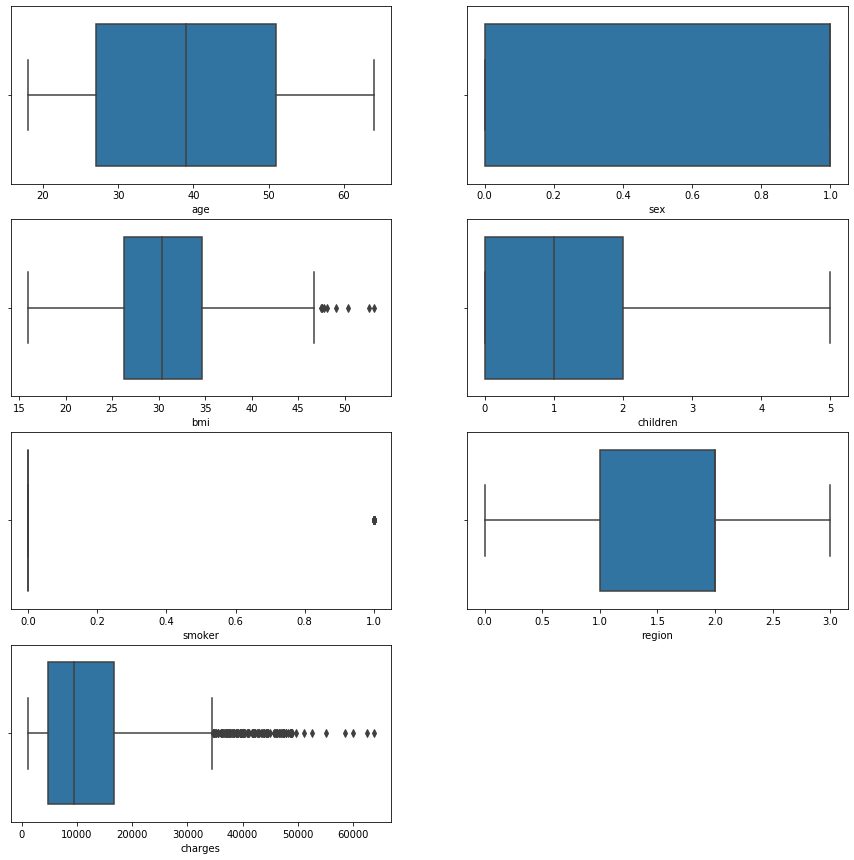

In [164]:
columns=df.select_dtypes(exclude='object').columns
figg=plt.figure(figsize=(15,15))
count=1
for i in columns:
    ax=figg.add_subplot(4,2,count)
    sns.boxplot(df[i],ax=ax)
    count=count+1
plt.show()

In [165]:
q1=df['charges'].quantile(0.25)
q3=df['charges'].quantile(0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
df=df[(df['charges']<ul) & (df['charges']>ll)]

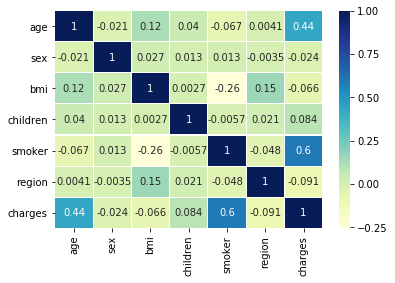

In [166]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidth=0.1)
plt.show()

In [167]:
# From the above heatmap, we can say that age, bmi and smoker have the most correlation with the target variable.

In [168]:
# The correlation of sex,children and region is too low with the target variable.

In [198]:
x=df.drop(['charges'],axis=1)
y=df.charges

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=14)

In [200]:
# Train_test_split is representative of the whole dataset.

In [201]:
import statsmodels.api as sm
linear_reg=sm.OLS(y_train,(sm.add_constant(x_train))).fit()
linear_reg.summary()

/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     244.5
Date:                Fri, 03 Jul 2020   Prob (F-statistic):          8.16e-180
Time:                        10:11:09   Log-Likelihood:                -8209.0
No. Observations:                 839   AIC:                         1.643e+04
Df Residuals:                     832   BIC:                         1.647e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3743.0616    930.090     -4.024      0.000   -5568.660   -1917.463
age          234.0215     10.791     21.687      0.000     212.841     255.202
sex          -69.6836    298.802     -0.233      0.816    -656.178     516.811
bmi           98.8600     27.331      3.617      0.000      45.214     152.506
children     380.7638    120.679      3.155      0.002     143.892     617.635
smoker      1.457e+04    460.573     31.640      0.000    1.37e+04    1.55e+04
region      -430.6017    135.542     -3.177      0.002    -696.646    -164.558
==============================================================================
Omnibus:                      566.406   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4734.952
Skew:                           3.167   Prob(JB):                         0.00
Kurtosis:                      12.763   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
# R-Square value is 0.64

In [ ]:
#TTest

In [203]:
from scipy.stats import ttest_ind
print(ttest_ind(x,x_train))
print('-'*100)
print(ttest_ind(x,x_test))

Ttest_indResult(statistic=array([ 0.16168208, -0.22484248,  0.80352315, -0.69973282, -1.08796215,
       -0.1440365 ]), pvalue=array([0.87157226, 0.82212438, 0.42176622, 0.48417412, 0.27674059,
       0.8854859 ]))
----------------------------------------------------------------------------------------------------
Ttest_indResult(statistic=array([-0.27993206,  0.39248897, -1.35783904,  1.2433035 ,  2.01446956,
        0.2528352 ]), pvalue=array([0.77956681, 0.69475068, 0.17471151, 0.21394319, 0.04413192,
       0.80042894]))


In [204]:
## Model

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [206]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [207]:
print('R-squared of Train set :',lr.score(x_train,y_train))
print('R-squared of Test set :',lr.score(x_test,y_test))

R-squared of Train set : 0.6381247451268228
R-squared of Test set : 0.5252816915435244


In [208]:
print('Root Mean Squared Error (RMSE) :',np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error (RMSE) : 5139.02976887133


In [209]:
print('Mean Absolute Percentage Error(MAPE)',np.mean(np.abs((y_test-y_pred)/y_test)))

Mean Absolute Percentage Error(MAPE) 0.3336167394756326


In [ ]:
## From the above values, the performance of the model is not ideal.
## RMSE value is very high(not good). This will mean that the predicted value will be +/- Rs.5139 the actual value
## MAPE value suggests that the predicted will is 33% more or less than the actual value.

In [210]:
##Backward Elimination Method:
cols=list(x.columns)
pmax=1
while(len(cols)>0):
    p=[]
    x_1=x[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE=cols
print(selected_features_BE)

['age', 'bmi', 'children', 'smoker', 'region']


/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [211]:
new_x=x[selected_features_BE]

In [212]:
x_train,x_test,y_train,y_test=train_test_split(new_x,y,train_size=0.7,random_state=14)

In [213]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [214]:
print('R-squared of Train set :',lr.score(x_train,y_train))
print('R-squared of Test set :',lr.score(x_test,y_test))

R-squared of Train set : 0.638101089743581
R-squared of Test set : 0.5246077519910182


In [215]:
print('Root Mean Squared Error (RMSE) :',np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error (RMSE) : 5142.676317803718


In [216]:
print('Mean Absolute Percentage Error(MAPE)',np.mean(np.abs((y_test-y_pred)/y_test)))

Mean Absolute Percentage Error(MAPE) 0.3341255874954386


In [217]:
result=pd.DataFrame()
cols=list(new_x.columns)
pmax=1
for i in range(0,len(new_x)):
    p=[]
    x_1=new_x[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    pvals=model.pvalues.values[1:]
    features=cols
    
result['Feature']=features
result['P-Values']=pvals

/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [218]:
result.sort_values('P-Values',ascending=True)

,Feature,P-Values
3,smoker,7.082381e-179
0,age,3.716708e-116
4,region,1.110036e-04
2,children,1.395174e-04
1,bmi,6.326163e-03


In [219]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [233]:
rfr=RandomForestRegressor(random_state=9)

In [234]:
param={'criterion':['mae','mse'],'max_depth':[4,5,6,7],'max_features':['auto','log2']}
gsv=GridSearchCV(rfr,param,cv=3,scoring='neg_mean_squared_error')

In [235]:
gsv.fit(x_train,y_train)

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/deploy/anaconda3/lib/python3.7/site-pa

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/deploy/anaconda3/lib/python3.7/site-pa

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=9,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mae', 'mse'], 'max_

In [236]:
gsv.best_params_

{'criterion': 'mae', 'max_depth': 7, 'max_features': 'log2'}

In [237]:
rfr_1=RandomForestRegressor(criterion='mse',max_depth=4,max_features='auto',random_state=10)

In [238]:
rfr_1.fit(x_train,y_train)

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [239]:
rfr_1.score(x_test,y_test)

0.5500402798480285

In [ ]:
### Business Interpretation:


From the data provided, it can be assumed that it predicts the medical insurance bill of an individual. After analysing 
the data provided and based on correlation and other findings, 
it can be concluded that the following factors have high influence:
    
    1. Smoker : Medical bill varies on whether the person is a smoker or not. 
    2. BMI : The Body Mass Index, plays another important role since it is a score of how healthy the person is 
        based on their height to weight ratio.
    3. Age : Age is an obvious factor influencing the medical needs of the induvidual.
        
The below factors have significantly lower influence on the individuals health:
    The gender of the person, the place of residence and the number of children they have.